**Source - Asteroid Light Curve Database 
https://sbn.psi.edu/pds/resource/lc.html**

**The above database consists of multiple files. The following observations are based on the summary file (LC Summary file) from the database.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)

In [3]:
LCSummary = pd.read_csv('lc_summary.csv',skiprows = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21])


In [5]:
#Listing selected columns
print(LCSummary[['Number','Name','Family','Diam','Class']])

       Number        Name Family    Diam Class
0           1       Ceres   MB-O  973.89     C
1           2      Pallas   MB-O  512.59     B
2           3        Juno   MB-M  252.00     S
3           4       Vesta      V  468.30     V
4           5     Astraea   MB-I  115.00     S
5           6        Hebe   MB-I  185.18     S
6           7        Iris   MB-I  199.83     S
7           8       Flora   FLOR  138.81     S
8           9       Metis      V  199.96     S
9          10      Hygiea   MB-O  351.00     C
10         11  Parthenope   MB-I  160.09     S
11         12    Victoria   MB-I  127.34     L
12         13      Egeria   MB-I  207.64     C
13         14       Irene   MB-I  152.29     S
14         15     Eunomia    EUN  255.33     S
15         16      Psyche   MB-O  225.00     X
16         17      Thetis      V   93.34     S
17         18   Melpomene   MB-I  140.57     S
18         19     Fortuna   NYSA  223.19     C
19         20    Massalia   MB-I  145.50     S
20         21

In [9]:
LCSummary.isnull().any()

Number        False
Name          False
Desig         False
Family        False
CSource       False
Class         False
DiamSource    False
DiamFlag      False
Diam          False
HSource       False
H             False
HBand         False
GSource       False
G             False
AlbSource     False
AlbFlag       False
Albedo        False
PFlag         False
Period        False
PerDesc       False
AmpFlag       False
AmpMin        False
AmpMax        False
U             False
Notes          True
Pole          False
IsBinary      False
WideField     False
SparseData    False
NotesEx       False
Private       False
dtype: bool

All fields except 'Notes' have non-null values.

In [6]:
# How many rows in the dataset?
LCSummary['Number'].count()


19940

In [8]:
#Just looking for the asteroid 'Ceres' details
LCSummary.loc[LCSummary['Name']=='Ceres']

,Number,Name,Desig,Family,CSource,Class,DiamSource,DiamFlag,Diam,HSource,H,HBand,GSource,G,AlbSource,AlbFlag,Albedo,PFlag,Period,PerDesc,AmpFlag,AmpMin,AmpMax,U,Notes,Pole,IsBinary,WideField,SparseData,NotesEx,Private
0,1,Ceres,-,MB-O,S,C,L,-,973.89,M,3.34,V,M,0.12,D,-,0.0857,S,9.07417,-,-,0.03,0.06,3,-,-,Y,N,N,N,N


In [9]:
#List all the collisional family types.
LCSummary.Family.unique()

array(['MB-O', 'MB-M', 'V', 'MB-I', 'FLOR', 'EUN', 'NYSA', 'THM', 'PHO',
       'MC', 'HIL', 'KOR', 'ERI', 'EOS', 'BAP', 'NEA', 'H', 'TR-J', 'KAR',
       'CEN', 'TR-M', 'TNO', 'HYPA', 'PS', '-'], dtype=object)

**TNO families are not considered to be asteroids(based on wikipedia), hence we can eliminate it**

In [11]:
#Eliminating records that belongs to 'TNO' family
tnofam= LCSummary[LCSummary['Family']=='TNO']
LCSummary = LCSummary.drop(tnofam.index, axis=0)

In [13]:
#Looking for rows with negative values for diameter
print(LCSummary[LCSummary['Diam']<=0][['Name','Albedo','Diam','H']])

               Name  Albedo  Diam      H
19025  1I/'Oumuamua   -9.99 -9.99  22.08
19930        P000DV   -9.99 -9.99  -9.99
19931        P000K7   -9.99 -9.99  -9.99
19932        P000TQ   -9.99 -9.99  -9.99
19933        P000ZE   -9.99 -9.99  -9.99
19935        P0012V   -9.99 -9.99  -9.99
19936        P001GV   -9.99 -9.99  -9.99
19937        P002I1   -9.99 -9.99  -9.99
19938        P002I6   -9.99 -9.99  -9.99
19939        P002RZ   -9.99 -9.99  -9.99


In [14]:
# As the rows with negative diameter do not have valid values for Albedo or H, we cannot calculate the diameter. Hence eliminate rows with invalid values for H,Albedo and Diam
invdiam= LCSummary[LCSummary['Albedo']<0]
LCSummary = LCSummary.drop(invdiam.index, axis=0)

In [16]:
# Sorting the rows based on descending values of diameter.
Sort_size = LCSummary.sort_values(by=['Diam'], ascending=False)

In [17]:
#Lets look at the top 10biggest asteroids
print(Sort_size.head(10)[['Number','Name','Family','Diam']])

       Number        Name Family    Diam
0           1       Ceres   MB-O  973.89
1           2      Pallas   MB-O  512.59
3           4       Vesta      V  468.30
9          10      Hygiea   MB-O  351.00
703       704  Interamnia   MB-O  316.62
510       511      Davida   MB-O  300.00
19926      -9     Hi'iaka     PS  300.00
51         52      Europa   MB-O  293.00
30         31  Euphrosyne   MB-O  279.82
1938     2060      Chiron    CEN  271.37


Per above, the largest asteroid in size is Ceres followed by Pallas.

In [18]:
#Lets look the 10smallest asteroids
print(Sort_size.tail(10)[['Number','Name','Family','Diam']])


       Number        Name Family   Diam
19352      -9    2009 TM8    NEA  0.006
19465      -9   2012 KT42    NEA  0.006
19416      -9   2010 VO21    NEA  0.005
19740      -9  2015 VY105    NEA  0.005
19410      -9   2010 TD54    NEA  0.005
19297      -9    2008 TC3    NEA  0.004
19287      -9   2008 JL24    NEA  0.004
19420      -9     2010 WA    NEA  0.003
19737      -9   2015 TC25    NEA  0.003
19202      -9  2006 RH120    NEA  0.003


Per above the smallest asteroid is 2006 RH120

In [19]:
# Now lets group the asteroids based on the classes they belongs.
#Lets find out the unique classes first
Aclass = LCSummary.Class.unique()
np.sort(Aclass)

array(['-', 'A', 'AS', 'B', 'BCU', 'BU', 'C', 'C:', 'CB', 'CB:', 'CBU',
       'CBU:', 'CD:', 'CF', 'CFB:', 'CFU:', 'CFXU', 'CGSU', 'CGTP:',
       'CGU', 'CP', 'CP:', 'CPF', 'CSGU', 'CSU', 'CTGU:', 'CU', 'CX',
       'CX:', 'CXF', 'Cgh', 'D', 'DCX', 'DCX:', 'DP', 'DSU:', 'DT', 'DTU',
       'DTU:', 'DU', 'DU:', 'DX', 'DX:', 'DXCU', 'E', 'ES', 'EU', 'F',
       'F:', 'FC', 'FC:', 'FCU', 'FCX', 'FCX:', 'FU', 'FX:', 'FXU:', 'G',
       'G:', 'GC', 'GS:', 'K', 'L', 'M', 'MU', 'MU:', 'O', 'P', 'P:',
       'PC', 'PD', 'PDC', 'PF', 'Q', 'QRS', 'R', 'S', 'SC', 'SCTU', 'SD',
       'SDU::', 'SG', 'SMU', 'SQ', 'ST', 'SU', 'Sq', 'T', 'TCG:', 'TD',
       'TDG', 'U', 'V', 'X', 'XB', 'XC', 'XCU', 'XD', 'XD:', 'XDC', 'XF',
       'XFC', 'XFU', 'XSC', 'XU', 'Xe', 'Xk', 'Xn'], dtype=object)

In [20]:
# Some classes are repeated (like C: and C),so applying the correction
LCSummary['Class']=LCSummary['Class'].replace(to_replace={'C:':'C','CB:':'CB','CBU:':'CBU','CP:':'CP','CX:':'CX','DCX:':'DCX','DTU:':'DTU','DU:':'DU','DX:':'DX','F:':'F','FC:':'FC','FCX:':'FCX','G:':'G','MU:':'MU','P:':'P','Sq':'SQ','XD:':'XD','CFU:':'CFU','Xk':'XK','DSU:':'DSU','Cgh':'CGH','FX:':'FX','GS:':'GS'},regex = True)

In [23]:
# Lets look at the final list
LCSummary.Class.unique()

array(['C', 'B', 'S', 'V', 'L', 'X', 'XC', 'TDG', 'K', 'T', 'M', 'XFC',
       'DCX', 'BU', 'F', 'BCU', 'A', 'P', 'CX', 'D', 'FC', 'PC', 'SCTU',
       'E', 'CXF', 'CP', 'CSGU', 'R', 'DP', 'DT', 'DX', 'Xe', 'TD', 'CSU',
       'CU', 'CB', 'FCX', 'CPF', 'PD', 'CGU', 'DU', 'XCU', 'CFB:', 'XDC',
       'SD', 'G', 'CD:', 'ST', 'CF', 'CGSU', 'FX', 'SU', 'SC', 'MU',
       'DXCU', 'XFU', 'GS', 'CBU', 'CTGU:', 'XF', 'XB', 'DTU', 'FU',
       'FXU:', 'XD', 'PF', 'CFU', 'XSC', 'XK', 'CGTP', 'FCU', 'PDC', 'GC',
       'XU', 'AS', 'Q', 'SMU', 'TCG', 'DSU', 'CFXU', 'SG', 'SQ', 'EU',
       'SDU:', 'QRS', 'O', 'U', 'Xn', 'ES', 'CGH', '-'], dtype=object)

In [22]:
sizebyclass = LCSummary.groupby('Class')['Name'].count()
print(sizebyclass)

Class
-            4
A           12
AS           1
B           52
BCU          2
BU           2
C         6439
CB           3
CBU          2
CD:          2
CF           1
CFB:         1
CFU          1
CFXU         1
CGH          1
CGSU         1
CGTP         1
CGU          1
CP           4
CPF          2
CSGU         1
CSU          3
CTGU:        1
CU           3
CX          15
CXF          1
D           38
DCX          3
DP           3
DSU          1
         ...  
S        12005
SC         203
SCTU         1
SD           1
SDU:         1
SG           2
SMU          1
SQ           2
ST           3
SU           3
T           17
TCG          1
TD           2
TDG          2
U            2
V           65
X          210
XB           2
XC          10
XCU          1
XD           2
XDC          2
XF           1
XFC          1
XFU          4
XK           1
XSC          1
XU           1
Xe           5
Xn           1
Name: Name, Length: 91, dtype: int64


In [24]:
# Find out the mean asteroid size for each class
sizebyclass = LCSummary.groupby('Class')['Diam'].mean().reset_index(name = 'Mean')
sizebyclass_a= sizebyclass.sort_values(by="Mean",ascending = 'True')
print(sizebyclass_a)

    Class        Mean
67    SMU    0.400000
36     ES    1.168692
59    QRS    1.480000
58      Q    1.838500
35      E    2.572110
75      U    2.580000
72    TCG    2.710000
65   SDU:    3.320000
62     SC    3.328399
90     Xn    4.000000
37     EU    4.230000
52      O    4.400000
61      S    4.991422
89     Xe    6.620000
66     SG    7.520000
14    CGH    7.680000
86     XK    7.820000
29    DSU    9.630000
34   DXCU   10.160000
68     SQ   11.930000
76      V   12.288446
2      AS   14.760000
6       C   15.424184
20   CSGU   19.030000
1       A   19.110000
80    XCU   24.500000
21    CSU   25.830000
51     MU   26.620000
22  CTGU:   27.330000
78     XB   27.590000
..    ...         ...
43     FX   58.690000
24     CX   58.770000
13   CFXU   59.210000
73     TD   59.315000
7      CB   59.620000
9     CD:   61.615000
15   CGSU   62.790000
4     BCU   66.240000
47     GS   66.640000
79     XC   67.168000
3       B   67.888096
74    TDG   72.660000
25    CXF   73.380000
83     XF 

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


Relation between Rotation period (in hours) and Asteroid diameter(km)

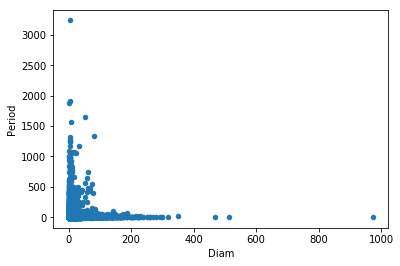

In [26]:
_ = LCSummary.plot.scatter(x='Diam', y='Period')

In [ ]:
As we can see above, rotation period is less for bigger asteroids and vice versa.